<img src="images/LOGO_2.jpg" width="600" />

# Feature Selection
**Feature selection is a process where you automatically select those features in your data that contribute most to the prediction variable or output in which you are interested.Having irrelevant features in your data can decrease the accuracy of many models, especially linear algorithms like linear and logistic regression.**

**Three benefits of performing feature selection before modeling your data are:**

> Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.
>> Improves Accuracy: Less misleading data means modeling accuracy improves.
>>> Reduces Training Time: Less data means that algorithms train faster.

**Importing libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('/root/Desktop/store.csv')

In [3]:
df.head()   # gives by default the top five rows of the data

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [4]:
df.tail()    #gives bottom five rows of the data

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [5]:
df.shape   #define the size of the data i.e (no. of rows * no. of columns)

(1115, 10)

In [6]:
df.describe()   # To analyze the numeric column in the data

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [7]:
df.isnull().sum()   # checking if there is any empty or missing values in the data

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [8]:
cat_cols = list(df.select_dtypes('object').columns)

In [9]:
num_cols = list(df.select_dtypes(include=['int64', 'float64']).columns)

**Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form. Machine learning algorithms can then decide in a better way on how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.**

In [11]:
cat_cols

['StoreType', 'Assortment', 'PromoInterval']

In [12]:
df.info()   #checking the value-counts and the type of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
Store                        1115 non-null int64
StoreType                    1115 non-null object
Assortment                   1115 non-null object
CompetitionDistance          1112 non-null float64
CompetitionOpenSinceMonth    761 non-null float64
CompetitionOpenSinceYear     761 non-null float64
Promo2                       1115 non-null int64
Promo2SinceWeek              571 non-null float64
Promo2SinceYear              571 non-null float64
PromoInterval                571 non-null object
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [13]:
df.PromoInterval.fillna('Unknown',inplace=True)   

**here we have filled the NA values in promoInterval column with the e UNKNOWN**

In [14]:
df.isnull().sum()  #now we can see the the PromoInterval has 0 missing values

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                  0
dtype: int64

**Checking Correlation**

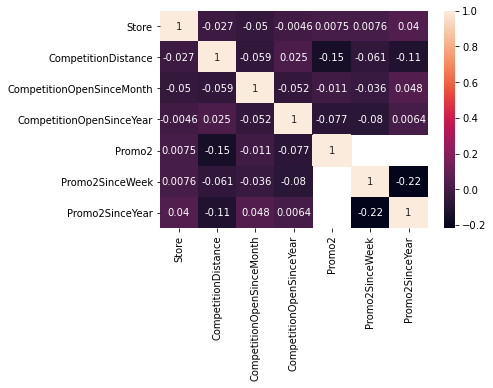

In [15]:
sns.heatmap(df.corr() , annot=True)
plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder

**Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form. Machine learning algorithms can then decide in a better way on how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.**

In [16]:
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [17]:
from sklearn.feature_selection import f_regression, mutual_info_regression, SelectKBest

# SelectKBest removes all but the  highest scoring features

In [18]:
feature_selector = SelectKBest(k=5, score_func=mutual_info_regression)

In [19]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
data = imputer.fit_transform(df.drop('CompetitionDistance',axis=1))

In [20]:
df.CompetitionDistance.fillna(method='ffill',inplace=True)  

**Here we habe filled the Missing values in CompetitionDistance using ffill**
# ffill stands for 'forward fill' and will propagate last valid observation forward.

In [21]:
new_data = feature_selector.fit_transform(data, df.CompetitionDistance)

In [22]:
new_data.shape

(1115, 5)

# GOOD LUCK

**About the Author**

<p>Hi! It's <a href="https://www.intellicial.in/">Intellicial Team</a> the author of this notebook. I hope you found this Notebook easy to learn!</p>

<p>Copyright © . <a href="https://www.intellicial.in/">Intellicial Innovations</a> .</p>